USA vs PRC 2020s heatmap score RC1 v4

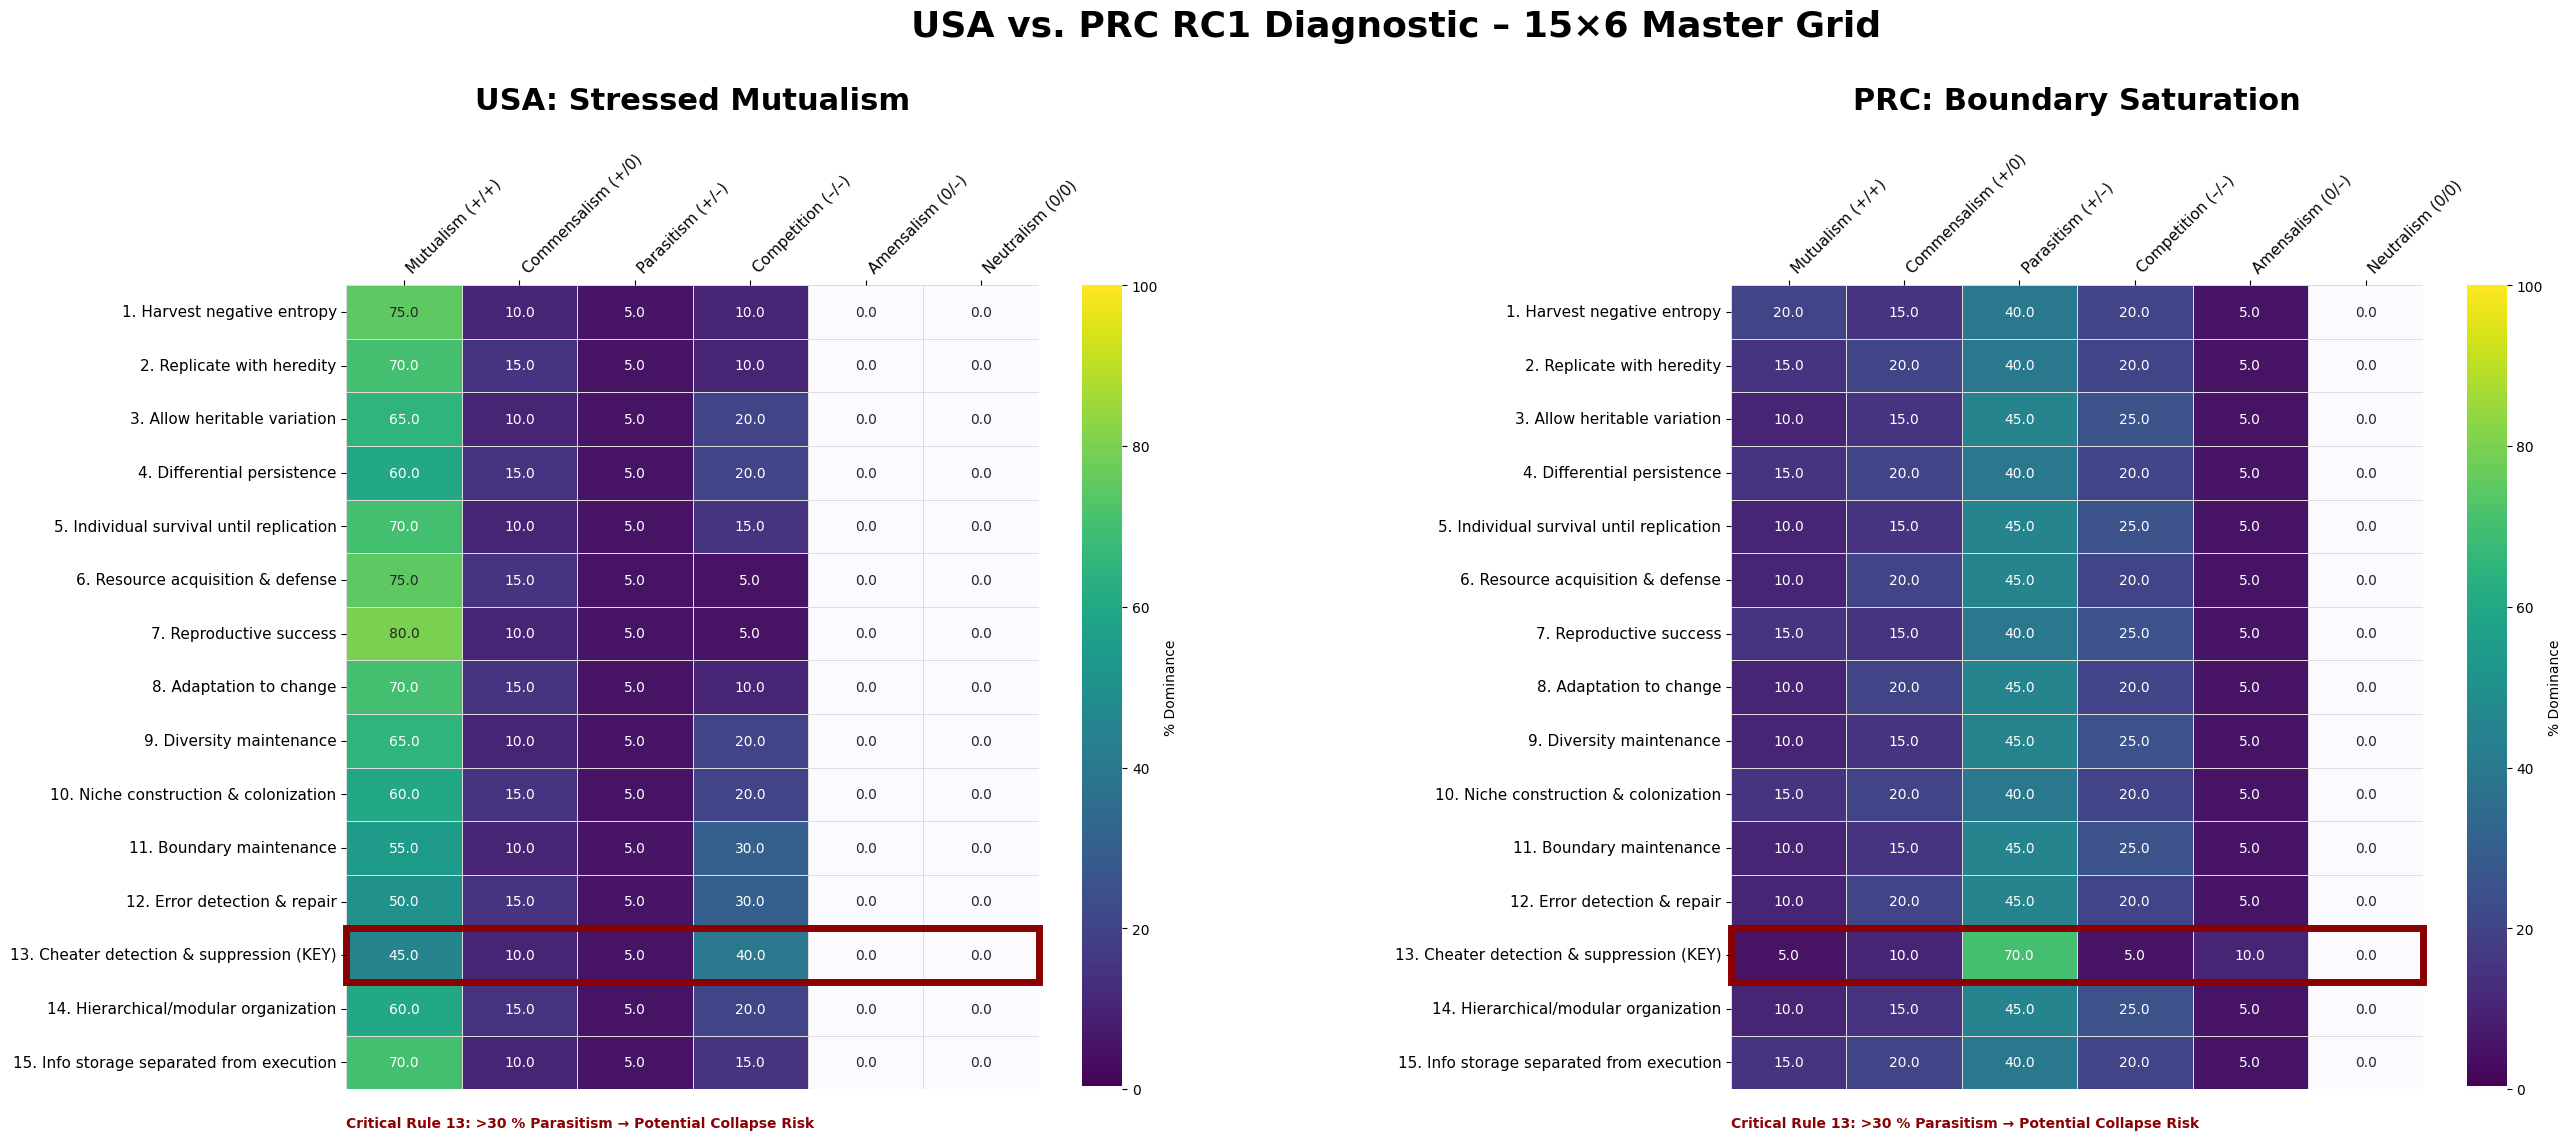

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

# 1. THE CANON
rules = [
    "1. Harvest negative entropy", "2. Replicate with heredity", "3. Allow heritable variation",
    "4. Differential persistence", "5. Individual survival until replication", "6. Resource acquisition & defense",
    "7. Reproductive success", "8. Adaptation to change", "9. Diversity maintenance",
    "10. Niche construction & colonization", "11. Boundary maintenance", "12. Error detection & repair",
    "13. Cheater detection & suppression (KEY)", "14. Hierarchical/modular organization",
    "15. Info storage separated from execution"
]
moves = ["Mutualism (+/+)", "Commensalism (+/0)", "Parasitism (+/–)",
         "Competition (–/–)", "Amensalism (0/–)", "Neutralism (0/0)"]

# 2. STYLING
viridis_base = mpl.colormaps["viridis"]
newcolors = viridis_base(np.linspace(0, 1, 256))
newcolors[0, :] = [0.98, 0.98, 1, 1] # Full grid "tinted" look
custom_map = LinearSegmentedColormap.from_list('FullSaturation', newcolors)
oxford_red = "#8B0000"

# 3. PLOTTING - Wide angle to allow for dual labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))

# Loop through both axes to apply identical label logic
for ax, data, title in zip([ax1, ax2], [usa_matrix, prc_matrix], ["USA: Stressed Mutualism", "PRC: Boundary Saturation"]):
    # Use DataFrames to ensure labeling is mapped 1:1
    df = pd.DataFrame(data, index=rules, columns=moves)

    sns.heatmap(df, annot=True, fmt=".1f", cmap=custom_map, vmin=0, vmax=100,
                linewidths=0.5, linecolor="#dddddd", cbar_kws={'label': '% Dominance', 'pad': 0.05}, ax=ax)

    # Force X-axis labels to top
    ax.xaxis.set_ticks_position('top')
    ax.set_xticklabels(moves, rotation=45, ha="left", fontsize=11)

    # FORCE Y-AXIS LABELS ON BOTH SIDES
    ax.tick_params(axis='y', which='major', labelleft=True) # Explicitly turn on labels
    ax.set_yticklabels(rules, rotation=0, fontsize=11)

    ax.set_title(title, fontsize=22, fontweight='bold', pad=30)

    # Rule 13 Highlight
    ax.add_patch(plt.Rectangle((0, 12), 6, 1, fill=False, edgecolor=oxford_red, lw=5, clip_on=False))

    # Provisional Warning Note
    ax.text(0, 15.5, "Critical Rule 13: >30 % Parasitism → Potential Collapse Risk",
            fontsize=10, color=oxford_red, ha='left', va='top', fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# 4. MASTER TITLE & SPACING
fig.suptitle("USA vs. PRC RC1 Diagnostic – 15×6 Master Grid",
             fontsize=26, fontweight='bold', y=1.05)

# wspace increased to 0.6 to give room for the Rules labels in the middle
plt.subplots_adjust(top=0.82, wspace=0.6, bottom=0.15, left=0.15)

plt.savefig("USA_vs_PRC_Double_Labels.png", dpi=300, bbox_inches="tight")
plt.show()